# 0. Library

In [77]:
# === Library Umum ===
import numpy as np                            
import pandas as pd                           
import seaborn as sns                         
import matplotlib.pyplot as plt               
import plotly.express as px                   
from plotly import graph_objects as go        
from plotly.subplots import make_subplots
import missingno                              
from scipy.stats import gaussian_kde           

# === Split Dataset ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  

# === Penanganan Missing Value ===
from sklearn.impute import SimpleImputer             
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer           
from sklearn.impute import KNNImputer                
import joblib

# === Encoding Fitur Kategorikal ===
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from category_encoders import OrdinalEncoder, BinaryEncoder  

# === Skala Fitur Numerik ===
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler  

# === Pipeline dan Transformasi Kolom ===
from sklearn.compose import ColumnTransformer        
from sklearn.pipeline import Pipeline                 

# === Validasi Silang ===
from sklearn.model_selection import cross_val_score   

# === Model Algoritma ===
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier  
  
# === Evaluasi Model ===
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix, classification_report
  

# === Hyperparameter Tuning ===
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

# === Penanganan Ketidakseimbangan Kelas (Imbalanced Class) ===
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE         
from imblearn.under_sampling import RandomUnderSampler, NearMiss     

# 1. Background

PT SinergiNet Indonesia adalah perusahaan yang bergerak di bidang telekomunikasi, menyediakan layanan internet, telepon, dan solusi digital bagi pelanggan individu maupun bisnis. Dalam beberapa tahun terakhir, perusahaan menghadapi tantangan besar akibat kondisi ekonomi nasional yang sedang lesu, menyebabkan daya beli masyarakat menurun dan kompetisi di industri telekomunikasi semakin ketat. Salah satu dampak paling signifikan adalah meningkatnya tingkat customer churn, yaitu pelanggan yang memutuskan berhenti berlangganan. Fenomena ini menurunkan pendapatan bulanan dan mengancam keberlanjutan bisnis, terutama karena biaya akuisisi pelanggan baru jauh lebih tinggi dibanding mempertahankan pelanggan lama.

Sebagai bagian dari tim data science, tugas kita adalah mengembangkan model machine learning yang mampu memprediksi pelanggan yang berpotensi churn pada bulan berikutnya. Model ini akan memanfaatkan berbagai variabel seperti durasi berlangganan (tenure), jenis kontrak, status layanan tambahan (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport), serta pola pembayaran dan biaya bulanan. Target utama dari model ini adalah tim pemasaran dan divisi retensi pelanggan, yang akan menggunakan hasil prediksi untuk merancang strategi intervensi seperti penawaran khusus, peningkatan layanan, atau program loyalitas. Dengan pendekatan ini, perusahaan diharapkan dapat mengurangi tingkat churn, menjaga pendapatan, dan meningkatkan kepuasan pelanggan di tengah tekanan ekonomi.

Berikut adalah penjelasan dari setiap kolom data yang akan dianalisa dan dipelajari oleh machine learning adalah sebagai berikut:
1. Dependents: Status tanggungan pelanggan (apakah memiliki tanggungan atau tidak).
2. Tenure: Lama waktu (dalam bulan) pelanggan telah berlangganan di perusahaan.
3. OnlineSecurity: Status layanan keamanan online (apakah pelanggan menggunakan atau tidak).
4. OnlineBackup: Status layanan pencadangan data online (apakah pelanggan menggunakan atau tidak).
5. InternetService: Status langganan layanan internet (apakah pelanggan berlangganan atau tidak).
6. DeviceProtection: Status perlindungan perangkat (apakah pelanggan menggunakan layanan tersebut atau tidak).
7. TechSupport: Status dukungan teknis (apakah pelanggan memiliki akses terhadap layanan dukungan teknis atau tidak).
8. Contract: Jenis kontrak berdasarkan durasi berlangganan.
9. PaperlessBilling: Status penagihan tanpa kertas (apakah pelanggan menerima tagihan dalam bentuk digital).
10. MonthlyCharges: Besaran biaya layanan yang dikenakan setiap bulan.
11. Churn: Status berhenti berlangganan (apakah pelanggan memutuskan untuk keluar dari layanan atau tidak).

In [2]:
# Load dataset mentah sebagai baseline untuk referensi (tanpa modifikasi)
df_raw = pd.read_csv("data_telco_customer_churn.csv")

# Buat salinan dataset untuk eksplorasi dan pembersihan data (EDA & preprocessing)
df_edit = pd.read_csv("data_telco_customer_churn.csv")

# Tampilkan 5 baris pertama dari df_edit_edit_edit_edit_edit_edit sebagai verifikasi awal struktur data
df_edit.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
# Tampilkan informasi umum dataset: jumlah baris, kolom, tipe data, dan non-null
print("=== Informasi Data ===")
df_edit.info()

# Tampilkan ringkasan statistik deskriptif untuk semua kolom numerik
print("\n=== Statistik Numerik ===")
display(df_edit.describe())

# Tampilkan ringkasan statistik deskriptif untuk semua kolom kategorik
print("\n=== Statistik Kategorik ===")
display(df_edit.describe(include="object"))

=== Informasi Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB

=== Statistik Numerik ===


,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000



=== Statistik Kategorik ===


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [4]:
# Ambil semua kolom bertipe data kategorikal (object) dari dataframe
df_info = df_edit.select_dtypes(include=["object"]).columns

# Telusuri nilai unik pada setiap fitur kategorikal
for col in df_info:
    print(f"Kolom: {col}")
    print(df_edit[col].unique())  # Menampilkan nilai-nilai unik dari kolom
    print("-" * 50)  # Separator visual agar output lebih mudah dibaca

Kolom: Dependents
['Yes' 'No']
--------------------------------------------------
Kolom: OnlineSecurity
['No' 'Yes' 'No internet service']
--------------------------------------------------
Kolom: OnlineBackup
['No' 'Yes' 'No internet service']
--------------------------------------------------
Kolom: InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Kolom: DeviceProtection
['Yes' 'No internet service' 'No']
--------------------------------------------------
Kolom: TechSupport
['Yes' 'No' 'No internet service']
--------------------------------------------------
Kolom: Contract
['Month-to-month' 'Two year' 'One year']
--------------------------------------------------
Kolom: PaperlessBilling
['Yes' 'No']
--------------------------------------------------
Kolom: Churn
['Yes' 'No']
--------------------------------------------------


Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

<Axes: >

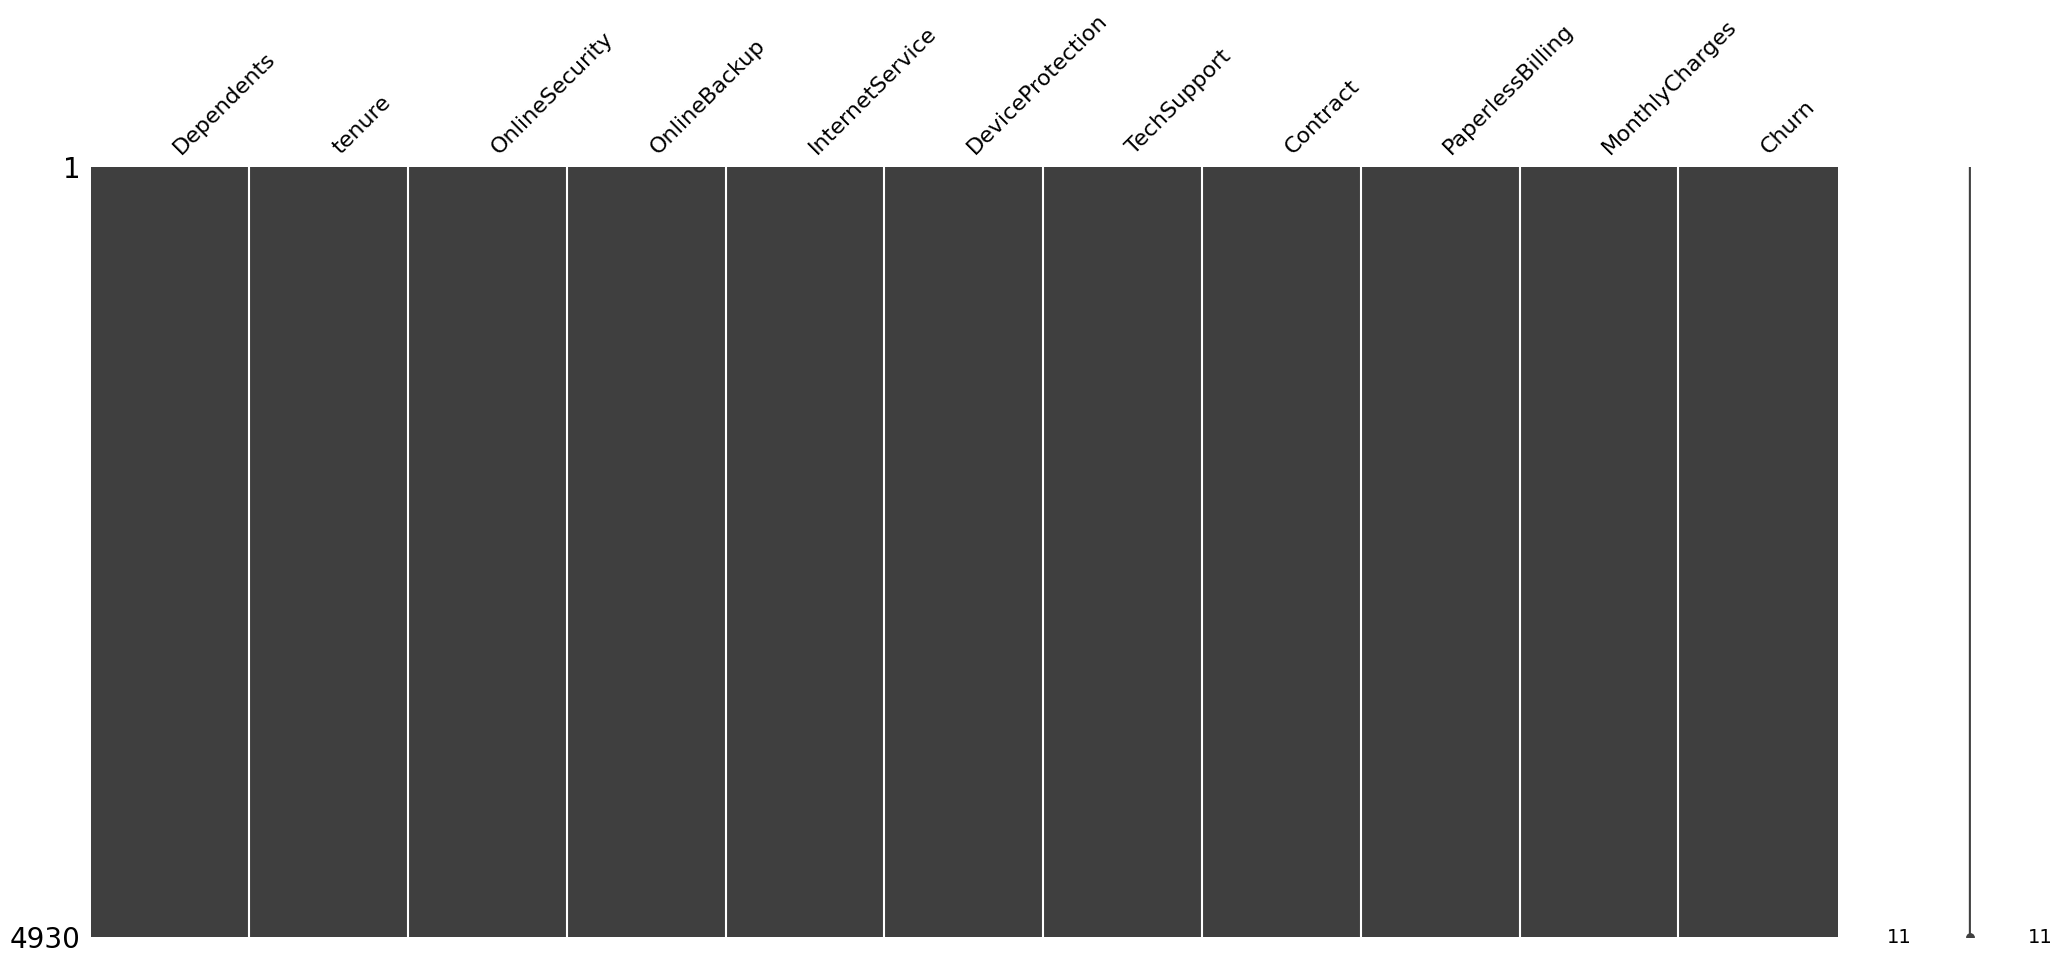

In [5]:
# Visualisasi distribusi data yang hilang (missing values) per kolom menggunakan missingno
display(df_edit.isnull().sum())
missingno.matrix(df_edit)

Dataset Telco Customer Churn ini terdiri dari 4930 entri dan 11 kolom, dengan struktur tipe data sebagai berikut: 2 kolom numerik (tenure dan MonthlyCharges), 3 kolom boolean (Dependents, PaperlessBilling, Churn), dan 6 kolom boolean yang memiliki kategori extra berupa "No internet service". Semua data lengkap tanpa nilai hilang.

# 2. Data Cleaning + EDA

## Identify Duplikat

In [6]:
# Hitung jumlah baris duplikat dalam dataset
df_edit.duplicated().sum()

np.int64(77)

In [7]:
# Hapus data duplikat dari dataframe agar tidak terjadi bias dalam analisis dan modeling
df_edit.drop_duplicates(inplace=True)

# Tampilkan jumlah data sebelum penghapusan duplikat
print(f"Jumlah data sebelum drop duplicate: {len(df_raw)}")

# Tampilkan jumlah data setelah penghapusan duplikat
print(f"Jumlah data setelah drop duplicate: {len(df_edit)}")

# Hitung dan tampilkan persentase proporsi data yang dihapus karena duplikat
print(f"Jumlah proporsi data yang dihapus: {(len(df_raw) - len(df_edit)) / len(df_raw) * 100:.2f}%")

Jumlah data sebelum drop duplicate: 4930
Jumlah data setelah drop duplicate: 4853
Jumlah proporsi data yang dihapus: 1.56%


Jumlah data sebelum penghapusan duplikat adalah 4.930 baris, setelah penghapusan menjadi 4.853 baris. Sebanyak 77 baris duplikat (1,56%) berhasil dihapus, menunjukkan bahwa duplikasi tidak signifikan dan tidak memengaruhi integritas data secara keseluruhan.

## Identify Outlier

In [8]:
# Ambil semua kolom numerik dari df_edit
num_cols = df_edit.select_dtypes(include="number").columns.tolist()

# Buat histogram distribusi untuk tiap kolom numerik
for hist in num_cols:
    hist_cols = px.histogram(df_edit, x=hist, title=f"Distribusi {hist}")
    hist_cols.update_layout(
        title={"x": 0.5},             # Judul tengah horizontal
        plot_bgcolor="rgba(0,0,0,0)", # Latar belakang plot transparan
        paper_bgcolor="rgba(0,0,0,0)"  # Latar belakang kanvas transparan
    )
    hist_cols.show()  # Tampilkan histogram interaktif

- Distribusi lama berlangganan (tenure) menunjukkan skewness positif (condong ke kanan), mengindikasikan mayoritas pelanggan memiliki durasi berlangganan yang pendek dengan sejumlah kecil pelanggan berlangganan lebih lama. 
- Demikian pula, distribusi biaya bulanan (Monthly Charges) juga memperlihatkan skewness positif, menunjukkan bahwa sebagian besar pelanggan membayar biaya rendah hingga menengah, sementara sebagian kecil membayar biaya yang lebih tinggi.

In [9]:
# Ambil semua kolom bertipe numerik dari dataframe
num_cols = df_edit.select_dtypes(include="number").columns.tolist()

for col in num_cols:
    
    boxplot=px.box(df_edit,x=col,color="Churn", title=f"Boxplot {col.capitalize()} Berdasarkan Churn")
    
    boxplot.update_layout(
    title={"x": 0.5},             # Judul diposisikan di tengah
    plot_bgcolor="rgba(0,0,0,0)", # Latar belakang plot dibuat transparan
    paper_bgcolor="rgba(0,0,0,0)" # Latar belakang seluruh kanvas juga transparan
)
    boxplot.show()

In [10]:
df_edit["tenure"].describe()

count    4853.000000
mean       32.679992
std        24.395554
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [11]:
display(df_edit[df_edit["tenure"]==0].value_counts().sum())
df_edit[df_edit["tenure"]==0]

np.int64(8)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


Nilai tenure 0 dihapus karena Pelanggan dengan tenure 0 sebenarnya belum cukup waktu berlangganan untuk dinilai sebagai loyal atau tidak. Oleh karena itu, memasukkan nilai ini justru akan menghasilkan potensi bias dalam analisis maupun model prediksi. Dengan menghapus tenure 0, fokus analisis menjadi lebih tajam pada pelanggan yang telah melewati masa uji coba awal dan memungkinkan penilaian loyalitas yang valid.

Sebaliknya, nilai tenure di kisaran 70–72 bulan tetap valid dan relevan, mencerminkan pelanggan yang berhenti setelah periode panjang, yang merupakan fenomena alami dalam bisnis langganan.

In [12]:
df_edit=df_edit[df_edit["tenure"]>=1]
# Tampilkan jumlah data sebelum penghapusan outlier
print(f"Jumlah baris sebelum pembersihan outlier pada kolom tenure:{len(df_raw)}")

# Tampilkan jumlah data setelah penghapusan outlier
print(f"Jumlah baris setelah pembersihan outlier pada kolom tenure:{len(df_edit)}")

# Hitung dan tampilkan persentase proporsi data yang dihapus karena outlier pada tenure
print(f"Proporsi baris yang dihapus: {8/ len(df_raw) * 100:.2f}%")

Jumlah baris sebelum pembersihan outlier pada kolom tenure:4930
Jumlah baris setelah pembersihan outlier pada kolom tenure:4845
Proporsi baris yang dihapus: 0.16%


Pembersihan data dengan menghapus nilai tenure = 0 yang tidak dapat diprediksi loyalitasnya berhasil mengeliminasi 0,16% dari total data. Meski proporsinya kecil, penghapusan ini krusial untuk memastikan validitas analisis dan meningkatkan akurasi model.

In [13]:
# Ambil semua kolom bertipe numerik dari dataframe
num_cols = df_edit.select_dtypes(include="number").columns.tolist()

for col in num_cols:
    
    boxplot=px.box(df_edit.sort_values(by="Churn", ascending=True),x=col,color="Churn", title=f"Distribusi {col.capitalize()} Berdasarkan Churn")
    
    boxplot.update_layout(
    title={"x": 0.5},             
    plot_bgcolor="rgba(0,0,0,0)", 
    paper_bgcolor="rgba(0,0,0,0)" 
)
    boxplot.show()

### Insight 
#### Tenure:
- Lama waktu (dalam bulan) pelanggan telah berlangganan di perusahaan.
- Pelanggan yang churn cenderung memiliki masa berlangganan yang jauh lebih pendek dibandingkan pelanggan loyal dan terjadi pada jangka waktu yang relatif singkat
    - Pelanggan yang Churn rata-rata berlangganan kurang dari 1 tahun(1-10 bulan), sedangkan pelanggan yang loyal rata-rata berlangganan 1-3 tahun(16-39 bulan)
- fokus utama harus diarahkan pada upaya mempertahankan pelanggan di bulan-bulan awal langganan agar tingkat loyalitas dapat meningkat secara signifikan
#### MonthlyCharges:
- Biaya langganan yang perlu dibayar per bulanya
- Pola pelanggan yang churn terdapat pada pelanggan yang harus membayar biaya per bulan dalam jumlah besar(59.2-94.3) 
    - Menunjukkan pelanggan yang lebih mudah churn adalah pelanggan yang memiliki uang berlebih untuk dikeluarkan
- Pola pelanggan yang loyal terdapat pada pelanggan dengan biaya per bulan dalam rentang 25.5-88.6 
    - Dapat diasumsikan rentang ini melambangkan masyarakat yang ekonominya tingkat menengah hingga menengah ke bawah
- Fokus utama adalah meningkatkan pelayanan jasa dan service terhadap pelanggan yang berani untuk membayar mahal setidaknya di 10 bulan pertama sehingga meningkatkan potensi untuk mereka bisa menjadi pelanggan yang loyal bagi perusahaan

In [14]:
# Visualisasi hubungan antara lama berlangganan (tenure) dan biaya bulanan (MonthlyCharges)
scatter = px.scatter(
    df_edit.head(100),               # Mengambil 100 baris pertama dari data
    x="tenure",                      # Sumbu X mewakili lama pelanggan berlangganan (dalam bulan)
    y="MonthlyCharges",             # Sumbu Y mewakili besarnya biaya langganan per bulan
    color="Churn",                  # Warna titik menunjukkan status Churn: Ya atau Tidak
    title="Distribusi Lama Berlangganan dan Biaya Bulanan Berdasarkan Status Churn"
)

# Pengaturan estetika tampilan plot
scatter.update_layout(
    title={"x": 0.5},               # Pusatkan judul di atas grafik
    plot_bgcolor="rgba(0,0,0,0)",   # Hilangkan latar belakang area plot (buat transparan)
    paper_bgcolor="rgba(0,0,0,0)"   # Hilangkan latar belakang kanvas keseluruhan
)

# Tampilkan grafik
scatter.show()

### Insight:
- Pelanggan dengan tenure rendah dan biaya bulanan rendah cenderung bertahan lebih lama, menandakan harga awal yang terjangkau berkontribusi signifikan terhadap retensi.
- Pelanggan baru dengan biaya bulanan tinggi memiliki risiko churn yang lebih besar, mengindikasikan potensi ketidakpuasan awal akibat biaya yang dirasa memberatkan atau nilai yang kurang sesuai.
- Pelanggan dengan tenure tinggi menunjukkan loyalitas yang kuat, terlepas dari variasi biaya bulanan, menegaskan pentingnya mempertahankan engagement jangka panjang.

## EDA kategorikal dengan churn sebagai Targetnya

In [15]:
cat_cols = ["Dependents", "OnlineSecurity", "OnlineBackup", 
            "InternetService", "DeviceProtection", 
            "TechSupport", "Contract", "PaperlessBilling"]

for col in cat_cols:
    # Hitung jumlah observasi per kategori dan churn
    bar_group = df_edit.groupby([col, "Churn"]).size().reset_index(name="Total")
    
    # Hitung total per kategori (untuk semua churn)
    total_per_category = bar_group.groupby(col)["Total"].transform("sum")
    
    # Hitung persentase tiap bar terhadap total kategori
    bar_group["percent"] = bar_group["Total"] / total_per_category * 100
    
    # Buat teks persentase dengan format 1 desimal dan tanda %
    bar_group["percent_text"] = bar_group["percent"].apply(lambda x: f"{x:.0f}%")
    
    # Buat bar plot dengan teks persentase
    bar = px.bar(
        bar_group,
        x=col,
        y="Total",
        color="Churn",
        barmode="group",
        text="percent_text",  # Tampilkan teks persentase di atas bar
        title=f"Pola Churn Menurut Kategori {col.capitalize()}"
    )

    bar.update_layout(
        title={"x": 0.5},
        plot_bgcolor="rgba(0,0,0,0)",
        paper_bgcolor="rgba(0,0,0,0)",
        margin=dict(t=50)
    )

    # Optional: agar teks di atas bar lebih jelas, atur posisi teks
    bar.update_traces(textposition='outside')

    bar.show()

In [16]:
# Untuk analisa
Ana= make_subplots(
    rows=2,
    cols=4,
    subplot_titles=[f"Churn by {col.capitalize()}" for col in cat_cols],
    vertical_spacing=0.10
)

# Iterasi dan buat plot untuk setiap kolom
for i, col in enumerate(cat_cols):
    # Hitung jumlah observasi per kategori dan churn
    bar_group = df_edit.groupby([col, "Churn"]).size().reset_index(name="count")

    # Hitung total per kategori (untuk semua churn)
    total_per_category = bar_group.groupby(col)["count"].transform("sum")

    # Hitung persentase tiap bar terhadap total kategori
    bar_group["percent"] = bar_group["count"] / total_per_category * 100

    # Buat teks persentase dengan format 1 desimal dan tanda %
    bar_group["percent_text"] = bar_group["percent"].apply(lambda x: f"{x:.0f}%")

    # Tentukan posisi subplot
    row = (i // 4) + 1
    col_num = (i % 4) + 1

    # Buat bar plot dan tambahkan ke subplot
    bar = px.bar(
        bar_group,
        x=col,
        y="count",
        color="Churn",
        barmode="group",
        text="percent_text",  # Tampilkan teks persentase di atas bar
    )

    # Atur posisi teks di atas bar
    bar.update_traces(textposition='outside')

    # Tambahkan bar plot ke subplot
    for trace in bar.data:
        Ana.add_trace(trace, row=row, col=col_num)

    # Update layout subplot (hilangkan untuk layout global)
    Ana.update_xaxes(title_text=col, row=row, col=col_num)
    Ana.update_yaxes(title_text="Count", row=row, col=col_num)

    # Atur aspect ratio untuk subplot
    Ana.update_xaxes(row=row, col=col_num, scaleanchor=f"y{((row - 1) * 4) + col_num}", scaleratio=0.5) # Sesuaikan scaleratio


# Update layout global untuk judul, background, margin, width dan height
Ana.update_layout(
    title_text="Pola Churn Berdasarkan Kategori",
    title_x=0.5,
    margin=dict(t=80),
    width=2000,  # Lebar total figure
    height=2000,
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
)

Ana.show()

Kelebihan dan kekurangan internet provider fiber optic dan DSL
| Aspek              | Fiber Optic                                         | DSL                                                |  
|--------------------|----------------------------------------------------|---------------------------------------------------|  
| **Kecepatan**      | Sangat tinggi (hingga Gbps) dengan stabilitas kuat | Lebih rendah, biasanya puluhan hingga ratusan Mbps|  
| **Kualitas Sinyal**| Hampir tanpa degradasi sinyal meskipun jarak jauh  | Kualitas menurun signifikan jika jarak jauh dari central office|  
| **Ketersediaan**   | Masih terbatas di beberapa area, terutama pedesaan | Lebih luas karena menggunakan kabel telepon lama  |  
| **Biaya Instalasi**| Mahal karena perlu infrastruktur khusus             | Lebih murah, menggunakan infrastruktur kabel tembaga yang sudah ada|  
| **Biaya Bulanan**  | Lebih mahal, tapi harga semakin kompetitif          | Lebih terjangkau secara umum                       |  
| **Keandalan**      | Tahan gangguan elektromagnetik, lebih tahan lama    | Rentan gangguan sinyal dari sumber eksternal      |  
| **Kecepatan Upload**| Simetris (upload = download)                         | Asimetris, upload jauh lebih rendah      |  
| **Skalabilitas**   | Mudah ditingkatkan sesuai kebutuhan jaringan         | Terbatas oleh kapasitas kabel tembaga dan teknologi DSL| 

- Sumber yang digunakan untuk analisa kelebihan dan kekurangan internet service:
    - https://www.eurofiber.com/en-be/lifeline/digital-transformation/difference-between-adsl-cable-fiber-optic
    - https://www.bestbuy.com/discover-learn/what-type-of-broadband-internet-is-best/pcmcat1703082930770
    - https://www.vsolcn.com/blog/adsl-vs-vdsl-vs-fiber-optic.html 

### Insight
#### Dependent(tanggungan):
- status tanggungan menunjukkan apakah pelanggan punya anggota keluarga atau pihak lain yang secara ekonomi menjadi tanggungannya
- Pelanggan tanpa tanggungan memiliki risiko churn dua kali lebih tinggi dibanding pelanggan dengan tanggungan (32% vs 15%), menunjukkan segmentasi yang jelas dalam loyalitas pelanggan
- Pelanggan dengan tanggungan cenderung lebih stabil dan loyal, karena kebutuhan keluarga yang menuntut kontinuitas layanan dan kurang sensitif terhadap harga
- Fokus mitigasi churn harus diarahkan pada pelanggan tanpa tanggungan melalui program loyalitas, insentif harga, dan layanan pelanggan yang dipersonalisasi, sekaligus menggali lebih dalam alasan loyalitas pelanggan dengan tanggungan untuk memperkuat positioning produk
#### Online Security:
- apakah pelanggan berlangganan atau memakai layanan keamanan online yang disediakan oleh perusahaan
- Pelanggan tanpa langganan Online Security menunjukkan tingkat churn sangat tinggi (41%), menandakan bahwa ketidakhadiran layanan keamanan online secara signifikan meningkatkan risiko pelanggan meninggalkan layanan
- Pelanggan dengan langganan OnlineSecurity hanya mengalami churn rendah (15%), menunjukkan bahwa layanan keamanan ini secara efektif meningkatkan loyalitas pelanggan
- Kategori "No Internet Service" memiliki tingkat churn yang sangat rendah (8%) karena pelanggan dalam kelompok ini tidak menggunakan layanan internet sehingga kebutuhan akan layanan keamanan online menjadi tidak relevan
#### Online Backup:
- apakah pelanggan memilih layanan pencadangan data secara online atau tidak
- Pelanggan tanpa layanan online backup memiliki tingkat churn dua kali lipat lebih tinggi (40%) dibandingkan yang menggunakan layanan online backup (21%)
- Pelanggan tanpa layanan internet menunjukkan churn sangat rendah (8%), yang menandakan churn dipengaruhi oleh faktor lain selain ada atau tidaknya layanan online backup
- Strategi retensi harus fokus pada peningkatan adopsi online backup melalui edukasi nilai keamanan data, bundling layanan dengan insentif, dan intervensi pemasaran yang terpersonalisasa karena online backup terbukti signifikan menurunkan churn
#### Internet service:
-  apakah pelanggan memiliki langganan internet aktif (DSL, Fiber optic) atau tidak berlangganan layanan internet sama sekali. 
- Meskipun Fiber Optic adalah layanan paling strategis dan canggih, churn rate hampir 42% mengindikasikan ada masalah mendasar seperti kualitas layanan, harga, atau ketersediaan.
- Churn DSL hanya sekitar 18%, jauh lebih rendah daripada Fiber Optic. Ini menunjukkan bahwa meskipun teknologinya lebih tua, DSL menawarkan layanan yang cukup stabil dan memenuhi ekspektasi pelanggan
#### Device Protection:
- apakah pelanggan berlangganan layanan perlindungan perangkat atau tidak
- Pelanggan tanpa langganan Device Protection memiliki churn rate hampir dua kali lipat lebih tinggi (38%) dibandingkan yang berlangganan (23%), menegaskan perlindungan perangkat sebagai faktor kunci dalam mempertahankan pelanggan
- Segment "No Internet Service" menunjukkan churn rendah (8%), namun data ini tidak relevan untuk analisis churn layanan karena pelanggan dalam segmen ini tidak menggunakan layanan internet
- Untuk mengurangi churn, strategi yang direkomendasikan adalah: 
    1. Memberikan diskon signifikan sebesar 20%-50% pada tahun pertama langganan Device Protection guna meningkatkan loyalitas pelanggan
    2. Melakukan kampanye pemasaran yang terfokus pada segmen pelanggan dengan pola churn tinggi untuk mengurangi pelanggan churn.
#### Tech Support:
- Mayoritas pelanggan tanpa langganan TechSupport menunjukkan churn tinggi sampai 41%, menegaskan bahwa ketiadaan layanan ini merupakan indikator kuat risiko kehilangan pelanggan.
- Pelanggan dengan TechSupport memiliki churn rendah signifikan, hanya 15%, membuktikan layanan teknis adalah pilar utama dalam menjaga retensi pelanggan.
- Ada perbedaan signifikan dalam pengaruh TechSupport di antara pelanggan yang tidak berlangganan dan berlangganan, menunjukkan urgensi strategi komunikasi yang lebih efektif untuk mempertahankan loyalitas pelanggan.
#### Contract:
- Pelanggan dengan kontrak bulanan memiliki risiko churn tertinggi hingga 43%, menandakan ketidakstabilan loyalitas pelanggan terjadi pada kontrak bulanan.
- kontrak dalam dua tahun hanya 3% churn, menunjukkan loyalitas pelanggan yang jauh lebih tinggi.Semakin panjang durasi kontrak, tingkat churn menurun drastis
- Strategi retensi harus fokus pada peningkatan konversi pelanggan bulanan ke kontrak jangka panjang dengan insentif dan komunikasi yang jelas.
#### Paperless Billing
- Status apakah pelanggan menerima tagihan dalam bentuk digital atau dalam kertas
- Mayoritas pelanggan yang tidak menggunakan paperless billing memiliki tingkat churn rendah, hanya sekitar 17%, menunjukkan loyalitas dan kemungkinan kenyamanan dengan metode tagihan tradisional.
- Pelanggan yang menggunakan paperless billing justru memiliki tingkat churn dua kali lipat lebih tinggi, yaitu 33%, menandakan ada faktor risiko yang tersembunyi di balik adopsi digital ini.
- Fokus pada peningkatan pengalaman layanan digital billing dan strategi retensi khusus untuk pelanggan yang membayar secara digital

### Summary
 - Berdasarkan analisis visualisasi data kategori dan numerik, dua faktor utama yang paling memengaruhi pelanggan berhenti berlangganan adalah jenis dan durasi kontrak serta kualitas layanan yang diberikan perusahaan. Berikut urutan fitur berdasarkan pengaruhnya terhadap risiko churn:
 
| No | Fitur             | Alasan                                                                                                  |  
|-----|-------------------|--------------------------------------------------------------------------------------------------------|  
| 1   | Contract          | Risiko churn tertinggi pada kontrak bulanan (43%) dan terendah pada kontrak dua tahun (3%)            |
| 2   | Tenure            | Pelanggan baru (<11 bulan) lebih rentan churn karena loyalitas belum terbentuk      |
| 3   | MonthlyCharges    | Biaya bulanan tinggi memicu churn akibat persepsi nilai layanan yang kurang sepadan          |     
| 4   | Online Security   | Pelanggan tanpa layanan keamanan online mengalami churn 41%, jauh lebih tinggi dibandingkan 15% pengguna layanan|
| 5   | Internet Service  | Churn 42% pada pengguna Fiber Optic, 18% pada DSL, dan 8% tanpa internet, menunjukkan pengaruh jenis layanan | 
| 6   | Tech Support      | Churn 41% pada pelanggan tanpa dukungan teknis, berbanding 15% pada yang menggunakan layanan           |  
| 7   | Device Protection | Churn 38% tanpa perlindungan perangkat, dibanding 22% pada yang memiliki layanan tersebut              |  
| 8   | Online Backup     | Churn 40% tanpa backup online, versus 21% pada pelanggan yang menggunakan layanan                     |  
| 9   | Paperless Billing | Pelanggan dengan paperless billing mengalami churn 33%, lebih tinggi dibanding 17% yang tidak menggunakan |  
| 10   | Dependent         | Churn 32% pada pelanggan tanpa tanggungan, berbanding 15% pada yang memiliki tanggungan                  |  



## Adjutment yang perlu dilakukan sebelum Mengolah data

In [17]:
# Buat salinan data yang akan digunakan untuk pemodelan machine learning
df_ml = df_edit.copy()

# Daftar kolom layanan berbasis internet yang mengandung kategori "No internet service"
service_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]

# Lakukan penyamaan kategori: ubah "No internet service" menjadi "No" agar tidak membingungkan model saat machile learning
for col in service_cols:
    df_ml[col] = df_ml[col].replace({"No internet service": "No"})

# Tampilkan nilai unik sebelum dan sesudah transformasi untuk memastikan proses telah berhasil
print("Kolom sebelum transformasi:",df_edit[col].unique()), 
print("Kolom sesudah transformasi:",df_ml[col].unique())

Kolom sebelum transformasi: ['Yes' 'No' 'No internet service']
Kolom sesudah transformasi: ['Yes' 'No']


Membuat data frame baru untuk machine learning dengan menggabungkan No internet service menjadi bagian dari No agar memudahkan machine learning mempelajari data

In [18]:
# Hitung jumlah pelanggan churn dan tidak churn
df_ml["Churn"].value_counts()

Churn
No     3557
Yes    1288
Name: count, dtype: int64

Dengan target machine learning adalah Churn, data ini tergolong imbalanced.

-  Asumsi False Positive dan False Negative berdasarkan kolom Churn:
    - False Positive(FP): 
        - Model memprediksi pelanggan akan churn (berhenti berlangganan), tapi kenyataannya pelanggan tersebut tidak churn (masih berlangganan)
        - Akibatnya adalah perusahaan mengalokasikan sumber daya, biaya promosi, atau program retensi kepada pelanggan yang sebenarnya tidak berencana berhenti, sehingga terjadi pemborosan anggaran dan waktu tanpa memberikan dampak signifikan terhadap penurunan churn
    - False Negative(FN): 
        - Model memprediksi pelanggan tidak churn (akan tetap berlangganan), tapi kenyataannya pelanggan tersebut justru churn.
        - Akibatnya adalah perusahaan gagal melakukan intervensi atau strategi retensi kepada pelanggan yang sebenarnya berisiko tinggi untuk berhenti, sehingga kehilangan pendapatan dan potensi loyalitas jangka panjang dari pelanggan tersebut.
    - Biaya yang dikeluarkan:
        - False Positive(FP):
            - Biaya pemeliharaan Jaringan internet: (500.000+2.500.000)/2=Rp 1.500.000,00
            - Biaya pemasangan Fiber optik: (5.000.000+15.000.000)/2=Rp 10.000.000,00
            - Biaya pelayanan service melalui whatsapp bot: Rp 1.560.000,00
            - Total Biaya yang dikeluarkan= 1.500.000+10.000.000+1.560.000=Rp 13.060.000
            - biaya retensi per orang= 13.060.000/TP= X/orang(Pelanggan yang hasil prediksi dan actualnya loyal)
        - False Negative(FN):
            - Pendapatan yang hilang di bulan depan per orang:(230.000+250.000+325.000+490.000)/4=Rp 323.750,00
    - Jika TP minimal 100 orang, maka biaya untuk retensi pelanggan sudah jauh di bawah biaya False negative
    - Data akan difokuskan untuk mendapatkan recall setinggi mungkin supaya pelanggan yang churn dapat diprediksi dengan setepat mungkin
---
- Sumber yang digunakan:
    - https://www.telkomsel.com/jelajah/jelajah-lifestyle/ini-harga-wifi-indihome-terbaru-tahun-2025-ih
    - https://www.gbs-indonesia.co.id/news/biaya-instalasi-jaringan-fiber-optik-terbaru
    - https://www.pilarsupport.com/biaya-pemeliharaan-jaringan-internet-dan-apa-saja-layanannya/
    - https://eva.id/pricing/
    - https://www.ruangmenyala.com/article/read/retensi-adalah

# 3. Modeling

- Pada tahap ini, pengembangan machine learning akan difokuskan pada peningkatan recall agar mampu menekan jumlah False Negative—situasi di mana pelanggan yang sebenarnya akan churn justru diprediksi tetap berlangganan. 
- Dengan menurunkan False Negative, perusahaan dapat melakukan intervensi kepada pelanggan berisiko sebelum mereka benar-benar berhenti, sehingga mengurangi kerugian pendapatan dan menekan biaya besar yang diperlukan untuk mendapatkan pelanggan baru. 
- Keberhasilan model akan diindikasikan oleh tingginya nilai recall pada data validasi yang relevan, serta dampaknya pada penurunan churn dalam proses bisnis nyata. 
- Validasi hasil akan dilakukan menggunakan teknik seperti cross-validation dan pengujian pada data uji terpisah. 
- Batasan model mencakup keterbatasan data historis yang mungkin belum sepenuhnya menangkap faktor eksternal seperti tren pasar dan aktivitas pesaing, sehingga hasil prediksi tetap memerlukan interpretasi bisnis sebelum diimplementasikan.

---
Tahap modeling untuk melihat model mana yang paling bagus untuk diadaptasi oleh machine learning:
- Semua Model akan diberikan penalti class weight=Balance agar recall model untuk mengurangi false negative dapat dikurangi
- Menggunakan F2 score dan fokus pada recall untuk menilai seberapa model mampu memprediksi pelanggan yang loyal
- Akan dilakukan 3 tahap untuk proses pembuatan machine learning:
    - Pertama   : Mencari top 2 dari 8 ML tanpa adanya proses feature selection
    - Kedua     : Mencari top 2 dari 8 ML setelah melakukan proses feature selection
    - Ketiga    : Membandingkan biaya yang harus dikeluarkan dari 4 machine learning beserta biaya tanpa machine learning  

## Best parameter without feature Selection

In [19]:
df_ml.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


### Define XY

In [20]:
X=df_ml.drop(columns="Churn")
Y=df_ml["Churn"].map({"No": 0, "Yes": 1})

### Data Splitting

In [21]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=42, stratify=Y)

### Preprocessing

In [235]:
# Pipeline
num_pipe_all=Pipeline([
    ("standard", StandardScaler())
])
cat_pipe_all=Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore")) #menghindari error saat model menerima kategori baru yang tidak ada di data training
])

# Gabung pipeline ke kolom Transform
transformers_all=ColumnTransformer([
    ("num", num_pipe_all, num_cols),
    ("cat", cat_pipe_all, cat_cols),
],  remainder="passthrough")

# Fit 
transformers_all.fit(X_train)
# Transform
X_train_prep_all=transformers_all.transform(X_train)
X_test_prep_all=transformers_all.transform(X_test)

### Cross Validation

Cross Validation akan dilakukan menggunakan 4 cara:
1. Random Forest: Model Umumnya kuat dan stabil
2. Decision Tree: Model lebih mudah diinterpretasi dibanding random forest
3. Logistic Regression: Model yang paling simpel dan cepat
4. KNearestNeighbors: Model bisa jadi Pelengkap model lain jika ada yang terlewat

In [23]:
# Define Algo
ranfor=RandomForestClassifier(
        random_state=42,
        max_depth=4,
        class_weight="balanced",  
    )
logreg=LogisticRegression(
        random_state=42,
        class_weight="balanced"
    )
dectree=DecisionTreeClassifier(
        random_state=42,
        max_depth=3,
        class_weight="balanced"
    )
knear=KNeighborsClassifier(
        n_neighbors=7,         # lebih banyak tetangga → prediksi lebih konservatif
        weights="distance")
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knear),
    ('clf3', dectree),
    ])
bagging =BaggingClassifier(
        estimator=dectree,
        random_state=42,)
adaboost =AdaBoostClassifier(
    random_state=42)
# Define score
f2_scorer = make_scorer(fbeta_score, beta=2)

In [24]:
list_algo=[ranfor,logreg,dectree,knear,voting,bagging,adaboost]
result_all={
    "model":[],
    "score":[],
    "mean_score":[],
    "mean_std":[]
}
for model in list_algo:
    # Pipeline
    pipeline_all=Pipeline([
        ("preprocessing", transformers_all),
        ("model", model)
    ])
    # Cross Validation
    cv_score_all=cross_val_score(
        pipeline_all,
        X_train,
        Y_train,
        cv=5,
        scoring=f2_scorer
    )
    # append
    result_all["model"].append(model)
    result_all["score"].append(cv_score_all)
    result_all["mean_score"].append(cv_score_all.mean().round(3))
    result_all["mean_std"].append(cv_score_all.std().round(3))

In [25]:
df_cross_all=pd.DataFrame(result_all)
df_cross_all.sort_values(by="mean_score", ascending=False)

,model,score,mean_score,mean_std
0,RandomForestClassifier(class_weight='balanced'...,"[0.6910946196660482, 0.6813996316758748, 0.759...",0.725,0.033
5,BaggingClassifier(estimator=DecisionTreeClassi...,"[0.7156133828996283, 0.6967213114754098, 0.718...",0.714,0.009
1,"LogisticRegression(class_weight='balanced', ra...","[0.6731662024141133, 0.6797020484171322, 0.738...",0.707,0.027
2,DecisionTreeClassifier(class_weight='balanced'...,"[0.7136194029850746, 0.6911344137273594, 0.707...",0.707,0.008
4,"VotingClassifier(estimators=[('clf1',\n ...","[0.6829035339063992, 0.6663424124513618, 0.720...",0.695,0.019
6,AdaBoostClassifier(random_state=42),"[0.5513918629550322, 0.41149943630214203, 0.59...",0.517,0.075
3,"KNeighborsClassifier(n_neighbors=7, weights='d...","[0.49842602308499473, 0.4807692307692308, 0.51...",0.494,0.018


In [26]:
df_cross_all['Model'] = df_cross_all['model'].apply(lambda m: type(m).__name__)
cross_bar=px.bar(df_cross_all.sort_values("mean_score", ascending=False),
                x="mean_score",
                y="Model", 
                color="Model",
                text="mean_std",
                title="Hasil Cross Validasi Machine Learning Dengan Semua Feature",
                labels={
                    "model":"Model",
                    "mean_score":"F2 Score"
                })
cross_bar.update_layout(title_x=0.5,
                        plot_bgcolor="rgba(0,0,0,0)",
                        paper_bgcolor="rgba(0,0,0,0)",
                        margin=dict(t=50)
                    )
cross_bar.show()

insight:
- F2 Score digunakan dalam machine learning untuk mengukur kemampuan model dalam memprediksi pelanggan yang akan churn, dengan fokus mengurangi False Negative. Semakin tinggi F2 Score, semakin baik kemampuan model dalam mengidentifikasi churn secara tepat
- Angka pada grafik menunjukkan mean pada standar deviasi (std). Nilai std yang lebih kecil menandakan model lebih stabil
- Random Forest memberikan performa terbaik dengan mean score tertinggi dan variasi (std) relatif rendah, mencerminkan konsistensi yang baik di berbagai fold.
- Bagging Classifier memiliki mean score sedikit di bawah Random Forest, namun unggul pada stabilitas dengan std score terkecil di antara seluruh model.
- Model lain, baik dari segi rata-rata skor maupun konsistensi, belum mampu menandingi performa dua model tersebut.
- Fokus tuning diarahkan pada Random Forest dan Bagging Classifier untuk memaksimalkan akurasi prediksi churn.

### Hyperparameter Tuning Random Forest

In [27]:
# Model
model_all=RandomForestClassifier(random_state=42, class_weight="balanced")
# Pipemodel
pipe_best_all=Pipeline([
    ("preprocessing", transformers_all),
    ("model", model_all)
])
# Param Grid
hyperparam_all= {
    'model__n_estimators': range(10,60,10),
    'model__max_features': range(1,6),
    'model__max_depth': range(3,21,3),
    'model__min_samples_split': range(2,30,5),
    'model__min_samples_leaf': range(2,30,5)
}
# Grid Search
gridsearch_all=GridSearchCV(
    estimator=pipe_best_all,
    param_grid=hyperparam_all,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1
)
# Fit
gridsearch_all.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          '...
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(3, 21, 3),
                         'model__max_features': range(1, 6),
                         'model__min_samples_leaf': range(2, 30, 5),
                         'model__min_samples_split': range(2, 30, 5),
                         'model__n_estimators': range(10, 60, 10)},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [28]:
pd.DataFrame(gridsearch_all.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
866,0.104429,0.040118,0.039990,0.033643,3,5,22,27,20,"{'model__max_depth': 3, 'model__max_features':...",0.718835,0.709091,0.752641,0.750452,0.740741,0.734352,0.017398,1
861,0.074267,0.016658,0.018334,0.003334,3,5,22,22,20,"{'model__max_depth': 3, 'model__max_features':...",0.718835,0.709091,0.752641,0.750452,0.740741,0.734352,0.017398,1
836,0.102445,0.038588,0.022382,0.015950,3,5,17,27,20,"{'model__max_depth': 3, 'model__max_features':...",0.718835,0.709091,0.752641,0.750452,0.740741,0.734352,0.017398,1
831,0.103020,0.027612,0.025921,0.015101,3,5,17,22,20,"{'model__max_depth': 3, 'model__max_features':...",0.718835,0.709091,0.752641,0.750452,0.740741,0.734352,0.017398,1
851,0.071751,0.009502,0.015411,0.003876,3,5,22,12,20,"{'model__max_depth': 3, 'model__max_features':...",0.718835,0.709091,0.752641,0.750452,0.740741,0.734352,0.017398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,0.272482,0.011344,0.026114,0.004919,18,4,2,2,50,"{'model__max_depth': 18, 'model__max_features'...",0.583756,0.608519,0.599798,0.619289,0.590062,0.600285,0.012704,5396
4140,0.086806,0.018616,0.024559,0.004676,15,4,2,2,10,"{'model__max_depth': 15, 'model__max_features'...",0.593909,0.599593,0.613949,0.589124,0.587045,0.596724,0.009637,5397
4680,0.075800,0.022526,0.022722,0.007997,18,2,2,2,10,"{'model__max_depth': 18, 'model__max_features'...",0.597990,0.578680,0.601392,0.582090,0.622449,0.596520,0.015651,5398
4860,0.094602,0.029253,0.025613,0.011199,18,3,2,2,10,"{'model__max_depth': 18, 'model__max_features'...",0.596192,0.587940,0.614470,0.584677,0.594008,0.595458,0.010362,5399


Dengan hyperparameter tuning hasil pada Random Forest naik 0.2%

### Predict to test Set Random Forest

In [29]:
# Pipeline
pipe_all = Pipeline([
    ("preprocessing", transformers_all),
    ("model", ranfor)
])
# Fitting
pipe_all.fit(X_train, Y_train)
# Predict
y_pred_train_all_before = pipe_all.predict(X_train)
Y_pred_test_all_before = pipe_all.predict(X_test)
# Eval
f2_scorer_train_all_before= fbeta_score(Y_train, y_pred_train_all_before, beta=2)
f2_scorer_test_all_before= fbeta_score(Y_test, Y_pred_test_all_before, beta=2)

In [30]:
# Define final model
final_model_all=gridsearch_all.best_estimator_
# Fitting
final_model_all.fit(X_train,Y_train)
# Predict
Y_pred_all=final_model_all.predict(X_test)
# Evalution
f2_scorer_all=fbeta_score(Y_test, Y_pred_all, beta=2)
print(classification_report(Y_test, Y_pred_all))

              precision    recall  f1-score   support

           0       0.92      0.68      0.79       890
           1       0.49      0.84      0.62       322

    accuracy                           0.73      1212
   macro avg       0.71      0.76      0.70      1212
weighted avg       0.81      0.73      0.74      1212



In [64]:
print("Before Tuning\n", classification_report(Y_test, Y_pred_test_all_before))
print("params Random Forest dengan semua feature: max_depth=4, class_weight=balanced")
print("Best F2 score Random Forest pada training dengan semua feature: {:.3f}".format(f2_scorer_train_all_before))
print("Best F2 score Random Forest pada test dengan semua feature: {:.3f}".format(f2_scorer_test_all_before))
print("-----------------------------------------------------------------------------")
print("After Tuning\n", classification_report(Y_test, Y_pred_all))
print("best params Random Forest dengan semua feature:",gridsearch_all.best_params_)
print("Best F2 score Random Forest pada training dengan semua feature: {:.3f}".format(gridsearch_all.best_score_))
print("Best F2 score Random Forest pada test dengan semua feature: {:.3f}".format(f2_scorer_all))

Before Tuning
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       890
           1       0.52      0.84      0.64       322

    accuracy                           0.75      1212
   macro avg       0.72      0.78      0.72      1212
weighted avg       0.82      0.75      0.76      1212

params Random Forest dengan semua feature: max_depth=4, class_weight=balanced
Best F2 score Random Forest pada training dengan semua feature: 0.733
Best F2 score Random Forest pada test dengan semua feature: 0.744
-----------------------------------------------------------------------------
After Tuning
               precision    recall  f1-score   support

           0       0.92      0.68      0.79       890
           1       0.49      0.84      0.62       322

    accuracy                           0.73      1212
   macro avg       0.71      0.76      0.70      1212
weighted avg       0.81      0.73      0.74      1212

best params Random Forest

Insight dengan menggunakan Random Forest untuk semua feature:
1. Sebelum Tuning
    - F2 score:
        - Train: 0.734
        - Test: 0.738
    - Kinerja pada kelas churn(0):
        - Recall: 0.84 -> Mayoritas pelanggan yang benar-benar churn berhasil terdeteksi
        - Precision: 0.52 -> Cukup banyak false positive, trade-off untuk menjaga recall tinggi
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.72, Precision: 0.92 -> Baik dalam mengidentifikasi pelanggan setia
    - Parameters:
        - max_depth=4,class_weight=balanced
    - Akurasi keseluruhan: 75%
    - Performa train dan test relatif seimbang
2. Setelah Tuning
    - F2 score:
        - Train: 0.733
        - Test: 0.744
    - Kinerja pada kelas churn(0):
        - Recall: 0.84 -> Tidak berubah 
        - Precision: 0.49 -> Turun sedikit dibandingkan sebelum tuning
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.68, Precision: 0.92 -> Precision tidak berubah tapi recall turun
    - Best parameter:
        - max_depth=3, max_features=5, min_samples_leaf=17, min_samples_split=2, n_estimators=20
    - Akurasi keseluruhan: 73% -> Akurasi turun 2% dibandingkan 
    - Model yang lebih sederhana tetapi mengorbankan recall dan akurasi
3. Kesimpulan
    - Sebelum tuning unggul pada akurasi (75% vs 73%) dan sedikit lebih tinggi pada precision untuk kelas churn, meskipun kompleksitas model lebih tinggi
    - Sesudah tuning memberikan model yang lebih sederhana (lebih mudah interpretasi, risiko overfit lebih rendah) dengan F2 score hampir sama, namun sedikit kehilangan akurasi dan precision
    - Dengan tujuan deteksi churn setinggi mungkin dengan tetap menjaga stabilitas performa, maka sebelum tuning yang akan digunakan

### Hyperparameter Tuning Bagging Classifier

In [32]:
# Redefine dan transform X Train 
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=42, stratify=Y)
# Model
base_all_bag=DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_all_bag=BaggingClassifier(estimator=base_all_bag, random_state=42)
# Pipemodel
pipe_best_all_bag=Pipeline([
    ("preprocessing", transformers_all),
    ("model", model_all_bag)
])
# Param Grid
hyperparam_all_bag= {
    'model__n_estimators':[25,26,27],
    'model__max_features':[3,4,5],
    'model__estimator__max_depth':[3,4,5],
    'model__estimator__min_samples_split': [26,27,28],
    'model__estimator__min_samples_leaf': [23,24,25]
}
gridsearch_all_bag=GridSearchCV(
    estimator=pipe_best_all_bag,
    param_grid=hyperparam_all_bag,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    error_score='raise'
)
# Fit
gridsearch_all_bag.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtect...
                                        BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                           random_state=42),
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'model__estimator__max_depth': [3, 4, 5],
                         'model__estimator__min_samples_leaf': [23, 24, 25],
                         'model__estimator__min_samples_split': [26, 27, 28],
                         'model__max_features': [3, 4, 5],
                         'model__n_estimators': [25, 26, 27]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

### Predict to test set BaggingClassifier

In [33]:
# Pipeline
pipe_bag = Pipeline([
    ("preprocessing", transformers_all),
    ("model", bagging)
])
# Fitting
pipe_bag.fit(X_train, Y_train)
# Predict
y_pred_train_bag_before = pipe_bag.predict(X_train)
Y_pred_test_bag_before = pipe_bag.predict(X_test)
# Evaluation
f2_scorer_train_bag_before= fbeta_score(Y_train, y_pred_train_bag_before, beta=2)
f2_scorer_test_bag_before= fbeta_score(Y_test, Y_pred_test_bag_before, beta=2)

In [34]:
# Define final model
final_model_all_bag=gridsearch_all_bag.best_estimator_
# Predict
Y_pred_all_bag = final_model_all_bag.predict(X_test)
# Evalution
f2_scorer_all_bag=fbeta_score(Y_test, Y_pred_all_bag, beta=2)

In [ ]:
print("Before Tuning\n", classification_report(Y_test, Y_pred_test_bag_before))
print("Best F2 score BaggingClassifier pada training dengan semua feature: {:.3f}".format(f2_scorer_train_bag_before))
print("Best F2 score BaggingClassifier pada test dengan semua feature: {:.3f}".format(f2_scorer_test_bag_before))
print("-----------------------------------------------------------------------------")
print("After Tuning\n", classification_report(Y_test, Y_pred_all_bag))
print("best params BaggingClassifier dengan semua feature:",gridsearch_all_bag.best_params_)
print("Best F2 score BaggingClassifier pada training dengan semua feature: {:.3f}".format(gridsearch_all_bag.best_score_))
print("Best F2 score BaggingClassifier pada test dengan semua feature: {:.3f}".format(f2_scorer_all_bag))

Before Tuning
               precision    recall  f1-score   support

           0       0.91      0.74      0.81       890
           1       0.52      0.79      0.63       322

    accuracy                           0.75      1212
   macro avg       0.72      0.77      0.72      1212
weighted avg       0.81      0.75      0.77      1212

Best F2 score BaggingClassifier pada training dengan semua feature: 0.716
Best F2 score BaggingClassifier pada test dengan semua feature: 0.718
-----------------------------------------------------------------------------
After Tuning
               precision    recall  f1-score   support

           0       0.93      0.69      0.80       890
           1       0.50      0.86      0.64       322

    accuracy                           0.74      1212
   macro avg       0.72      0.78      0.72      1212
weighted avg       0.82      0.74      0.75      1212

best params BaggingClassifier dengan semua feature: {'model__estimator__max_depth': 3, 'model__

Insight dengan menggunakan Bagging Classifier untuk semua feature:
1. Sebelum Tuning
    - F2 score:
        - Train: 0.716
        - Test: 0.718
    - Kinerja pada kelas churn(0):
        - Recall: 0.79 -> Mayoritas pelanggan yang benar-benar churn berhasil terdeteksi
        - Precision: 0.52 -> Cukup banyak false positive, trade-off untuk menjaga recall tinggi
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.74, Precision: 0.91 -> Baik dalam mengidentifikasi pelanggan setia
    - Parameters:
        - None
    - Akurasi keseluruhan: 75%
    - Performa train dan test relatif seimbang
2. Setelah Tuning
    - F2 score:
        - Train: 0.737
        - Test: 0.756
    - Kinerja pada kelas churn(0):
        - Recall: 0.86 -> Recall Meningkat jauh dibandingkan sebelum tuning 
        - Precision: 0.50 -> Precision Meningkat sedikit dibandikan sebelum tuning    
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.69, Precision: 0.93 -> Precision naik sedikit tetapi recall turun cukup banyak
    - Best parameter:
        - max_depth=3, max_features=4, min_samples_leaf=23,min_samples_split=26, n_estimators=27
    - Akurasi keseluruhan: 74% -> Akurasi turun 1% dibandingkan sebelum tuning 
    - Model menjadi lebih sederhana, kompleksitas berkurang, dan potensi overfitting menurun.
3. Kesimpulan
    - Sebelum tuning unggul pada akurasi keseluruhan (75% vs 74%) dan sedikit lebih tinggi pada precision churn, dengan performa train–test yang konsisten
    - Sesudah tuning unggul pada F2 score test (0.756 vs 0.718) dan recall churn (0.86 vs 0.79), walau precision churn sedikit turun. Model juga lebih sederhana, sehingga lebih mudah diinterpretasi dan lebih stabil untuk data baru
    - Dengan tujuan deteksi churn setinggi mungkin dengan tetap menjaga stabilitas performa, maka setelah tuning yang akan digunakan

### Mencari Best Feature

In [36]:
# Karena model ada dalam pipeline, panggil model RandomForest dari pipeline:
rf_model = final_model_all.named_steps['model']

# Ambil fitur hasil transformasi (termasuk one-hot)
feature_names_num = num_cols  
feature_names_cat = final_model_all.named_steps['preprocessing'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)
feature_names = np.concatenate([feature_names_num, feature_names_cat])

# Ambil importance
importances = rf_model.feature_importances_

# Buat DataFrame untuk visualisasi
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df[feat_imp_df["Importance"]>0.01].sort_values(by='Importance', ascending=False)

print(feat_imp_df)
# Bar plot
fig_bar_all=px.bar(feat_imp_df[feat_imp_df["Importance"]>0.01], x="Importance", y="Feature", color="Feature", text="Importance", title="Best Feature")
fig_bar_all.update_layout(
    title_x=0.5,
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
    margin=dict(t=50)
)
fig_bar_all.update_traces(textposition='outside')
fig_bar_all.show() 

                        Feature  Importance
0                        tenure    0.269961
15      Contract_Month-to-month    0.264433
17            Contract_Two year    0.181223
9   InternetService_Fiber optic    0.128319
1                MonthlyCharges    0.041972
10           InternetService_No    0.038912
8           InternetService_DSL    0.021957


Insight:
- Feature yang akan diuji selanjutnya dipilih berdasarkan nilai importance di atas 0.01 karena fitur-fitur tersebut memberikan kontribusi signifikan terhadap prediksi model.
- Terdapat 4 dari 11 fitur yang dianggap paling relevan, yaitu: tenure, contract, internet service, monthly charges
- Fokus pada fitur-fitur ini mungkin bisa meningkatkan efisiensi model dengan mengurangi kompleksitas tanpa mengorbankan performa prediksi

## Best Parameter with Feature Selection

### Define XY

In [37]:
X=df_ml[["tenure", "Contract", "InternetService","MonthlyCharges"]]
Y=df_ml["Churn"].map({"No": 0, "Yes": 1})

### Data Split

In [38]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=42, stratify=Y)

### Preprocessing

In [39]:
# redefine feature kategorikal dan numerikal
num_cols_feat=["tenure", "MonthlyCharges"]
cat_cols_feat=["Contract", "InternetService"]

# Pipeline
num_pipe_feat=Pipeline([
    ("standard", StandardScaler())
])
cat_pipe_feat=Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore")) #menghindari error saat model menerima kategori baru yang tidak ada di data training
])

# Gabung pipeline ke kolom Transform
transformers_feat=ColumnTransformer([
    ("num", num_pipe_feat, num_cols_feat),
    ("cat", cat_pipe_feat, cat_cols_feat),
],  remainder="drop")

# Fit 
transformers_feat.fit(X_train)

# Transform
X_train_prep_feat=transformers_feat.transform(X_train)
X_test_prep_feat=transformers_feat.transform(X_test)

### Cross Validation

In [40]:
list_algo=[ranfor,logreg,dectree,knear,voting,bagging,adaboost]
result_feat={
    "model":[],
    "score":[],
    "mean_score":[],
    "mean_std":[]
}
for model in list_algo:
    # Pipeline
    pipeline_feat=Pipeline([
        ("preprocessing", transformers_feat),
        ("model", model)
    ])
    # Cross Validation
    cv_score_feat=cross_val_score(
        pipeline_feat,
        X_train,
        Y_train,
        cv=5,
        scoring=f2_scorer
    )
    # append
    result_feat["model"].append(model)
    result_feat["score"].append(cv_score_feat)
    result_feat["mean_score"].append(cv_score_feat.mean().round(3))
    result_feat["mean_std"].append(cv_score_feat.std().round(3))

In [41]:
df_cross_feat=pd.DataFrame(result_feat)
df_cross_feat.sort_values(by="mean_score", ascending=False)

,model,score,mean_score,mean_std
0,"(DecisionTreeClassifier(max_depth=4, max_featu...","[0.7011070110701108, 0.6932966023875115, 0.745...",0.720,0.022
5,(DecisionTreeClassifier(class_weight='balanced...,"[0.7156133828996283, 0.6967213114754098, 0.718...",0.714,0.009
1,"LogisticRegression(class_weight='balanced', ra...","[0.6972477064220184, 0.6721162579473207, 0.722...",0.712,0.026
2,DecisionTreeClassifier(class_weight='balanced'...,"[0.7136194029850746, 0.6911344137273594, 0.707...",0.707,0.008
4,"VotingClassifier(estimators=[('clf1',\n ...","[0.6939163498098859, 0.6669865642994242, 0.698...",0.695,0.017
3,"KNeighborsClassifier(n_neighbors=7, weights='d...","[0.5257623554153522, 0.45064377682403434, 0.50...",0.503,0.027
6,AdaBoostClassifier(random_state=42),"[0.6339468302658486, 0.40770101925254815, 0.47...",0.489,0.085


In [42]:
df_cross_feat['Model'] = df_cross_feat['model'].apply(lambda m: type(m).__name__)
cross_bar_feat=px.bar(df_cross_feat.sort_values("mean_score", ascending=False),
                x="mean_score",
                y="Model", 
                color="Model",
                text="mean_std",
                title="Hasil Cross Validasi Machine Learning Dengan Feature Selection",
                labels={
                    "model":"Model",
                    "mean_score":"F2 Score"
                })
cross_bar_feat.update_layout(title_x=0.5,
                        plot_bgcolor="rgba(0,0,0,0)",
                        paper_bgcolor="rgba(0,0,0,0)",
                        margin=dict(t=50)
                    )
cross_bar_feat.show()

insight:
- Random Forest menunjukkan performa terbaik dengan nilai mean score tertinggi dan variasi (std) yang relatif cukup bagus, menandakan konsistensi yang baik.
- Bagging Classifier memiliki mean score sedikit lebih rendah dibandingkan Random Forest, namun keunggulannya terletak pada standar deviasi (std score) yang paling kecil, yang mencerminkan kestabilan model yang lebih tinggi
- Model-model lain baik dari segi rata-rata skor maupun konsistensi performa tidak mampu menandingi dua model tersebut.
- fokus tuning diarahkan pada Random Forest dan Bagging Classifier 

### Hyperparameter Tuning Random Forest with feature Selection

In [43]:
# Model
model_feat_forest=RandomForestClassifier(random_state=42, class_weight="balanced")
# Pipemodel
pipe_best_feat_forest=Pipeline([
    ("preprocessing", transformers_feat),
    ("model", model_all)
])
# Param Grid
hyperparam_feat_forest= {
    'model__n_estimators': range(10,60,10),
    'model__max_features': range(1,6),
    'model__max_depth': range(3,21,3),
    'model__min_samples_split': range(2,30,5),
    'model__min_samples_leaf': range(2,30,5)
}
# Grid Search
gridsearch_feat_forest=GridSearchCV(
    estimator=pipe_best_feat_forest,
    param_grid=hyperparam_feat_forest,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1
)
# Fit
gridsearch_feat_forest.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Contract',
                                                                          'InternetService'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': range(3, 21, 3),
                         'model__max_features': range(1, 6),
                         'model__min_samples_leaf': range(2, 30, 5),
                         'model__min_samples_split': range(2, 30, 5),
                         'model__n_estimators': range(10, 60, 10)},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

### Predict to Test set

In [44]:
# Pipeline
pipe_feat_forest = Pipeline([
    ("preprocessing", transformers_feat),
    ("model", ranfor)
])
# Fitting
pipe_feat_forest.fit(X_train, Y_train)
# Predict
y_pred_train_feat_forest_before = pipe_feat_forest.predict(X_train)
Y_pred_test_feat_forest_before = pipe_feat_forest.predict(X_test)
# Evaluation
f2_scorer_train_feat_forest_before= fbeta_score(Y_train, y_pred_train_feat_forest_before, beta=2)
f2_scorer_test_feat_forest_before= fbeta_score(Y_test, Y_pred_test_feat_forest_before, beta=2)

In [45]:
# Define final model
final_model_feat_forest=gridsearch_feat_forest.best_estimator_
# Fitting
final_model_feat_forest.fit(X_train,Y_train)
# Predict
Y_pred_feat_forest=final_model_feat_forest.predict(X_test)
# Evalution
f2_scorer_feat_forest=fbeta_score(Y_test, Y_pred_feat_forest, beta=2)

In [66]:
print("Before Tuning\n", classification_report(Y_test, Y_pred_test_feat_forest_before))
print("Params Random Forest dengan feature selection: max_depth=4, class weight=balanced")
print("Best F2 score Random Forest pada training dengan feature selection: {:.3f}".format(f2_scorer_train_feat_forest_before))
print("Best F2 score Random Forest pada test dengan feature selection: {:.3f}".format(f2_scorer_test_feat_forest_before))
print("-----------------------------------------------------------------------------")
print("After Tuning\n", classification_report(Y_test, Y_pred_all_bag))
print("best params Random Forest dengan feature selection:",gridsearch_feat_forest.best_params_)
print("Best F2 score Random Forest pada training dengan feature selection: {:.3f}".format(gridsearch_feat_forest.best_score_))
print("Best F2 score Random Forest pada test dengan feature selection: {:.3f}".format(f2_scorer_feat_forest))

Before Tuning
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       890
           1       0.52      0.83      0.64       322

    accuracy                           0.75      1212
   macro avg       0.72      0.77      0.72      1212
weighted avg       0.81      0.75      0.76      1212

Params Random Forest dengan feature selection: max_depth=4, class weight=balanced
Best F2 score Random Forest pada training dengan feature selection: 0.733
Best F2 score Random Forest pada test dengan feature selection: 0.741
-----------------------------------------------------------------------------
After Tuning
               precision    recall  f1-score   support

           0       0.93      0.69      0.80       890
           1       0.50      0.86      0.64       322

    accuracy                           0.74      1212
   macro avg       0.72      0.78      0.72      1212
weighted avg       0.82      0.74      0.75      1212

best params R

Insight dengan menggunakan Random Forest dengan feature selection:
1. Sebelum Tuning
    - F2 score:
        - Train: 0.733
        - Test: 0.741
    - Kinerja pada kelas churn(0):
        - Recall: 0.83 -> Mayoritas pelanggan yang benar-benar churn berhasil terdeteksi
        - Precision: 0.52 -> Cukup banyak false positive, trade-off untuk menjaga recall tinggi
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.72, Precision: 0.92 -> Baik dalam mengidentifikasi pelanggan setia
    - Parameters:
        - max_depth=4,class_weight=balanced
    - Akurasi keseluruhan: 75%
    - Performa train dan test relatif seimbang
2. Setelah Tuning
    - F2 score:
        - Train: 0.735
        - Test: 0.745
    - Kinerja pada kelas churn(0):
        - Recall: 0.86 -> Meningkat 3% 
        - Precision: 0.50 -> Menurun 2%
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.69, Precision: 0.93 -> Precision naik 1% tapi recall turun 3%
    - Best parameter:
        - max_depth=3, max_features=5, min_samples_leaf=17, min_samples_split=2, n_estimators=20
    - Akurasi keseluruhan: 74% -> Akurasi turun 1%  
3. Kesimpulan
    - Sebelum tuning unggul pada akurasi (75% vs 74%) dan sedikit lebih tinggi pada precision untuk kelas churn, meskipun kompleksitas model lebih tinggi
    - Sesudah tuning memberikan model yang lebih sederhana (lebih mudah interpretasi, risiko overfit lebih rendah) dengan F2 score hampir sama, namun sedikit kehilangan akurasi dan precision
    - Dengan tujuan deteksi churn setinggi mungkin dengan tetap menjaga stabilitas performa, maka setelah tuning yang akan digunakan

### Hyperparameter tuning BaggingClassifier With Feature Selection

In [47]:
# Redefine dan transform X Train 
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, random_state=42, stratify=Y)
# Model
base_feat_bag=DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_feat_bag=BaggingClassifier(estimator=base_feat_bag, random_state=42)
# Pipemodel
pipe_best_feat_bag=Pipeline([
    ("preprocessing", transformers_feat),
    ("model", model_feat_bag)
])
# Param Grid
hyperparam_feat_bag= {
    'model__n_estimators':[21,23,25],
    'model__max_features':[1,2,4],
    'model__estimator__max_depth':[2,5,7],
    'model__estimator__min_samples_split': [13,15,17],
    'model__estimator__min_samples_leaf': [22,24,26]
}
# Grid Search
gridsearch_feat_bag=GridSearchCV(
    estimator=pipe_best_feat_bag,
    param_grid=hyperparam_feat_bag,
    cv=5,
    scoring=f2_scorer,
    n_jobs=-1,
    error_score='raise'
)
# Fit
gridsearch_feat_bag.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standard',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Contract',
                                                                          'InternetService'])])),
                                       ('model',
                                        BaggingClassifier(estimator=Decisi...r(class_weight='balanced',
                                                                                           random_state=42),
                                                          random_state=42))]),
             n_jobs=-1,
             param_grid={'model__estimator__max_depth': [2, 5, 7],
                         'model__estimator__min_samples_leaf': [22, 24, 26],
                         'model__estimator__min_samples_split': [13, 15, 17],
                         'model__max_features': [1, 2, 4],
                         'model__n_estimators': [21, 23, 25]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

### Predict to test Set

In [67]:
# Pipeline
pipe_feat_bag = Pipeline([
    ("preprocessing", transformers_feat),
    ("model", bagging)
])
# Fitting
pipe_feat_bag.fit(X_train, Y_train)
# Predict
y_pred_train_feat_bag_before = pipe_feat_bag.predict(X_train)
Y_pred_test_feat_bag_before = pipe_feat_bag.predict(X_test)
# Evaluation
f2_scorer_train_feat_bag_before= fbeta_score(Y_train, y_pred_train_feat_bag_before, beta=2)
f2_scorer_test_feat_bag_before= fbeta_score(Y_test, Y_pred_test_feat_bag_before, beta=2)

In [68]:
# Define final model
final_model_feat_bag=gridsearch_feat_bag.best_estimator_
# Predict
Y_pred_feat_bag = final_model_feat_bag.predict(X_test)
# Evalution
f2_scorer_feat_bag=fbeta_score(Y_test, Y_pred_feat_bag, beta=2)

In [ ]:
print("Before Tuning\n", classification_report(Y_test, Y_pred_test_feat_forest_before))
print("Params BaggingClassifier dengan feature selection: max_depth=3,class_weight=balanced")
print("Best F2 score BaggingClassifier pada training dengan feature selection: {:.3f}".format(f2_scorer_train_feat_bag_before))
print("Best F2 score BaggingClassifier pada test dengan feature selection: {:.3f}".format(f2_scorer_test_feat_bag_before))
print("-----------------------------------------------------------------------------")
print("After Tuning\n", classification_report(Y_test, Y_pred_all_bag))
print("best params BaggingClassifier dengan feature selection:",gridsearch_feat_bag.best_params_)
print("Best F2 score BaggingClassifier pada training dengan feature selection: {:.3f}".format(gridsearch_feat_bag.best_score_))
print("Best F2 score BaggingClassifier pada test dengan feature selection: {:.3f}".format(f2_scorer_feat_bag))

Before Tuning
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       890
           1       0.52      0.83      0.64       322

    accuracy                           0.75      1212
   macro avg       0.72      0.77      0.72      1212
weighted avg       0.81      0.75      0.76      1212

Params BaggingClassifier dengan feature selection: max_depth=3,class_weight=balanced
Best F2 score BaggingClassifier pada training dengan feature selection: 0.716
Best F2 score BaggingClassifier pada test dengan feature selection: 0.718
-----------------------------------------------------------------------------
After Tuning
               precision    recall  f1-score   support

           0       0.93      0.69      0.80       890
           1       0.50      0.86      0.64       322

    accuracy                           0.74      1212
   macro avg       0.72      0.78      0.72      1212
weighted avg       0.82      0.74      0.75      1212

be

Insight dengan menggunakan BaggingClassifier dengan feature selection:
1. Sebelum Tuning
    - F2 score:
        - Train: 0.716
        - Test: 0.718
    - Kinerja pada kelas churn(0):
        - Recall: 0.83 -> Mayoritas pelanggan yang benar-benar churn berhasil terdeteksi
        - Precision: 0.52 -> Cukup banyak false positive, trade-off untuk menjaga recall tinggi
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.72, Precision: 0.92 -> Baik dalam mengidentifikasi pelanggan setia
    - Parameters:
        - max_depth=3,class_weight=balanced
    - Akurasi keseluruhan: 75%
    - Performa train dan test relatif seimbang
2. Setelah Tuning
    - F2 score:
        - Train: 0.736
        - Test: 0.755
    - Kinerja pada kelas churn(0):
        - Recall: 0.86 -> Tidak berubah
        - Precision: 0.50 -> Menurun 2%
    - Kinerja pada kelas Tidak Churn (0)
        - Recall: 0.69, Precision: 0.93 -> Precision naik 1% tapi recall turun 3%
    - Best parameter:
        - max_depth=3, max_features=5, min_samples_leaf=17, min_samples_split=2, n_estimators=20
    - Akurasi keseluruhan: 74% -> Akurasi turun 1%  
3. Kesimpulan
    - Sebelum tuning unggul pada akurasi (75% vs 74%) dan sedikit lebih tinggi pada precision untuk kelas churn, meskipun kompleksitas model lebih tinggi
    - Sesudah tuning memberikan kompleksitas model yang lebih mirip dengan F2 score yang jauh lebih tinggi , namun sedikit kehilangan akurasi dan precision
    - Dengan tujuan deteksi churn setinggi mungkin dengan tetap menjaga stabilitas performa, maka setelah tuning yang akan digunakan

# 4. Evaluasi

## Best Machine learning

In [71]:
print("\nRandom Forest dengan semua feature\n", classification_report(Y_test, Y_pred_test_feat_forest_before))
print("Params Random Forest dengan feature selection: max_depth=4, class weight=balanced")
print("Best F2 score Random Forest pada training dengan feature selection: {:.3f}".format(f2_scorer_train_feat_forest_before))
print("Best F2 score Random Forest pada test dengan feature selection: {:.3f}".format(f2_scorer_test_feat_forest_before))
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("\nRandom Forest dengan feature selection\n",classification_report(Y_test, Y_pred_feat_forest))
print("best params Random Forest dengan 4 feature:",gridsearch_feat_forest.best_params_)
print("Best F2 score Random Forest pada training dengan 4 Feature: {:.3f}".format(gridsearch_feat_forest.best_score_))
print("Best F2 score Random Forest pada test dengan 4 feature: {:.3f}".format(f2_scorer_feat_forest))
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("\nBagging Classifier dengan semua feature\n",classification_report(Y_test, Y_pred_all_bag))
print("best params BaggingClassifier dengan semua feature:",gridsearch_all_bag.best_params_)
print("Best F2 score BaggingClassifier pada training dengan semua feature: {:.3f}".format(gridsearch_all_bag.best_score_))
print("Best F2 score BaggingClassifier pada test dengan semua feature: {:.3f}".format(f2_scorer_all_bag))
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("\nBagging Classifier dengan feature selection\n",classification_report(Y_test, Y_pred_feat_bag))
print("best params BaggingClassifier dengan feature selection:",gridsearch_feat_bag.best_params_)
print("Best F2 score BaggingClassifier pada training feature selection: {:.3f}".format(gridsearch_feat_bag.best_score_))
print("Best F2 score BaggingClassifier pada test dengan feature selection: {:.3f}".format(f2_scorer_feat_bag))


Random Forest dengan semua feature
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       890
           1       0.52      0.83      0.64       322

    accuracy                           0.75      1212
   macro avg       0.72      0.77      0.72      1212
weighted avg       0.81      0.75      0.76      1212

Params Random Forest dengan feature selection: max_depth=4, class weight=balanced
Best F2 score Random Forest pada training dengan feature selection: 0.733
Best F2 score Random Forest pada test dengan feature selection: 0.741
----------------------------------------------------------------------------------------------------------------------------------------------------------

Random Forest dengan feature selection
               precision    recall  f1-score   support

           0       0.93      0.71      0.80       890
           1       0.51      0.84      0.64       322

    accuracy                           0.74      1

Insight:

| Model & Fitur                         | F2 Train | F2 Test | Recall Churn (1) | Precision Churn (1) | Recall Non-Churn (0) | Precision Non-Churn (0) | Akurasi | Parameter Utama                                                                                               |
| ------------------------------------- | -------- | ------- | ---------------- | ------------------- | -------------------- | ----------------------- | ------- | ------------------------------------------------------------------------------------------------------------- |
| **Random Forest – Semua Feature**       | 0.733    | 0.741   | 0.83             | 0.52                | 0.72                 | 0.92                    | 75%     | max\_depth=4, class\_weight=balanced                                                                          |
| **Random Forest – Feature Selection** | 0.735    | 0.745   | 0.84             | 0.51                | 0.71                 | 0.93                    | 74%     | max\_depth=3, max\_features=1, min\_samples\_leaf=22, min\_samples\_split=2, n\_estimators=10                 |
| **Bagging – Semua Feature**             | 0.737    | 0.756   | 0.86             | 0.50                | 0.69                 | 0.93                    | 74%     | est\_max\_depth=3, est\_min\_samples\_leaf=23, est\_min\_samples\_split=26, max\_features=4, n\_estimators=27 |
| **Bagging – Feature Selection**       | 0.736    | 0.755   | 0.90             | 0.46                | 0.61                 | 0.95                    | 69%     | est\_max\_depth=5, est\_min\_samples\_leaf=26, est\_min\_samples\_split=13, max\_features=1, n\_estimators=21 |
----
- Random Forest – Semua Feature
    - Akurasi tertinggi (75%), precision churn cukup baik (0.52)
    - Recall churn sedikit lebih rendah (0.83) dibanding model lain
    - Cocok untuk menjaga keseimbangan antara precision & recall
- Random Forest – Feature Selection
    - Model lebih sederhana, recall churn naik (0.84), F2 Test sedikit lebih baik (0.745)
    - Akurasi turun sedikit (74%), precision churn sedikit lebih rendah (0.51)
    - Cocok untuk deteksi churn dengan model yang lebih ringan
- Bagging – Semua Feature
    - F2 Test tertinggi (0.756) di seluruh model, recall churn tinggi (0.86), precision non-churn tinggi (0.93)
    - Akurasi hanya 74%, precision churn rendah (0.50)
    - Cocok untuk Deteksi churn agresif dengan F2 score optimal
- Bagging – Feature Selection
    - Recall churn tertinggi (0.90)
    - Akurasi (69%) dan precision churn terendah (0.46)
    - Cocok untuk Kasus di mana false negative harus hampir nol, walaupun false positive banyak
- Machine learning dengan semua feature selalu menghasilkan akurasi yang lebih tinggi dibandingkan feature selection
    - Random Forest: All feature vs feature selection(75% vs 74%)
    - Bagging Classifier:  All feature vs feature selection(74% vs 69%)
- Tujuan utama machine learning adalah memaksimalkan deteksi churn (recall tinggi) sambil menjaga keseimbangan precision dan akurasi, Bagging dengan semua fitur adalah pilihan terbaik
    - F2 Test tertinggi: 0.756
    - Recall churn tinggi: 0.86
    - Precision non-churn terbaik: 0.93
    - Akurasi baik: 74%
    - Model yang paling sederhana
---
Limitasi Model Machine Learning:
- Hasil prediksi Bagging Classifier dengan akurasi 86% tidak dapat dijadikan patokan mutlak, mengingat jumlah data relatif kecil (4.853 observasi).
- Seluruh model menunjukkan kelemahan pada precision churn yang rendah, artinya banyak pelanggan diprediksi akan churn padahal sebenarnya tidak.
- Model berbasis Bagging mampu mencapai recall churn yang lebih tinggi, namun mengorbankan akurasi dan precision.
- Random Forest memberikan performa yang lebih seimbang, tetapi masih menghasilkan jumlah false positive churn yang cukup besar.
- Feature selection menyederhanakan model dan mengurangi kompleksitas, namun tidak secara signifikan mengatasi trade-off antara precision dan recall.    

## Confusion Matrix

In [ ]:
# Semua diprediksi churn
cm_pred = np.where(
    (X_test['tenure'] >= 1) & (X_test['tenure'] < 10),
    1,  # Prediksi churn
    0   # Prediksi loyal
)
cm_churn = confusion_matrix(Y_test,cm_pred)

# Label
x_labels = ['Loyal (0)', 'Churn (1)']  # True labels
y_labels = ['Loyal (0)', 'Churn (1)']  # Predicted labels

# Buat heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm_churn,
    x=x_labels,
    y=y_labels,
    colorscale='Viridis',
    showscale=True,
    hovertemplate="Predicted %{y}<br>True %{x}<br>Count: %{z}<extra></extra>"
))

# Tambahkan anotasi 
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        fig.add_annotation(
            x=x_labels[j],
            y=y_labels[i],
            text=str(cm_churn[i][j]),
            showarrow=False,
            font=dict(color="black", size=14)
        )

# Layout transparan
fig.update_layout(
    title="Predicting Churn Based on Tenure (<10 Months)",
    title_x=0.5,
    xaxis_title="Actual Label",
    yaxis_title="Predicted Label",
    plot_bgcolor='rgba(0,0,0,0)',   
    paper_bgcolor='rgba(0,0,0,0)'   
)

fig.show()

- Diketahui dari EDA Tenure bahwa pelanggan yang akan churn biasanya terdapat pada bulan 1-10
- Sebelum Machine Learning, perusahaan tidak bisa tahu siapa yang akan loyal di jangka panjang, sehingga semua customer diatas 10 bulan dianggap loyal:
    - Kerugian yang diterima oleh perusahaan: 
        - FN* Pendapatan hilang=160*323.750=Rp 51.800.500,00
    - Perusahaan mengalami kerugian 52 Jt rupiah karena gagal memberikan promosi kepada customer untuk tetap berlangganan

In [ ]:
cm_all_forest=confusion_matrix(Y_test, Y_pred_test_all_before)

# Label
x_labels = ['Loyal (0)', 'Churn (1)']  # True labels
y_labels = ['Loyal (0)', 'Churn (1)']  # Predicted labels

# Buat heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm_all_forest,
    x=x_labels,
    y=y_labels,
    colorscale='viridis',
    showscale=True,
    hovertemplate="Predicted %{y}<br>True %{x}<br>Count: %{z}<extra></extra>"
))

# Tambahkan anotasi angka 
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        fig.add_annotation(
            x=x_labels[j],
            y=y_labels[i],
            text=str(cm_all_forest[i][j]),
            showarrow=False,
            font=dict(color="black", size=14)
        )

# Layout transparan
fig.update_layout(
    title="Confusion Matrix — Random Forest(All Features)",
    title_x=0.5,
    xaxis_title="Actual Label",
    yaxis_title="Predicted Label",
    plot_bgcolor='rgba(0,0,0,0)',   
    paper_bgcolor='rgba(0,0,0,0)'  
)

fig.show()

Dengan machine learning random forest(All Feature):
- Biaya promosi yang tidak perlu dikeluarkan: 
    - FP* Biaya Promosi/TP=53*13.060.000/638=Rp 1.084.922,00
- Kerugian karena kehilangan customer: 
    - FN* Pendapatan hilang=252*323.750=Rp 81.585.000,00
- Total kerugian yang ditanggung perusahaan: 
    - 1.084.922+81.585.000=Rp 82,669,922

In [ ]:
cm_feat_forest=confusion_matrix(Y_test, Y_pred_feat_forest)

# Label
x_labels = ['Loyal (0)', 'Churn (1)']  # True labels
y_labels = ['Loyal (0)', 'Churn (1)']  # Predicted labels

# Buat heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm_feat_forest,
    x=x_labels,
    y=y_labels,
    colorscale='viridis',
    showscale=True,
    hovertemplate="Predicted %{y}<br>True %{x}<br>Count: %{z}<extra></extra>"
))

# Tambahkan anotasi angka
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        fig.add_annotation(
            x=x_labels[j],
            y=y_labels[i],
            text=str(cm_feat_forest[i][j]),
            showarrow=False,
            font=dict(color="black", size=14)
        )

# Layout transparan
fig.update_layout(
    title="Confusion Matrix — Random Forest(Feature Selection)",
    title_x=0.5,
    xaxis_title="Actual Label",
    yaxis_title="Predicted Label",
    plot_bgcolor='rgba(0,0,0,0)',   
    paper_bgcolor='rgba(0,0,0,0)'   
)

fig.show()

Dengan machine learning random forest(Feature Selection):
- Biaya promosi yang tidak perlu dikeluarkan: 
    - FP* Biaya Promosi/TP=51*13.060.000/630=Rp 1.057.239,00
- Kerugian karena kehilangan customer: 
    - FN* Pendapatan hilang=260*323.750=Rp 84.175.500,00
- Total kerugian yang ditanggung perusahaan: 
    - 1.057.239+84.175.500=Rp 85.232.739,00

In [ ]:
cm_all_bagging=confusion_matrix(Y_test, Y_pred_all_bag)

# Label
x_labels = ['Loyal (0)', 'Churn (1)']  # True labels
y_labels = ['Loyal (0)', 'Churn (1)']  # Predicted labels

# Buat heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm_all_bagging,
    x=x_labels,
    y=y_labels,
    colorscale='viridis',
    showscale=True,
    hovertemplate="Predicted %{y}<br>True %{x}<br>Count: %{z}<extra></extra>"
))

# Tambahkan anotasi angka
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        fig.add_annotation(
            x=x_labels[j],
            y=y_labels[i],
            text=str(cm_all_bagging[i][j]),
            showarrow=False,
            font=dict(color="black", size=14)
        )

# Layout transparan
fig.update_layout(
    title="Confusion Matrix — Bagging Classifier(All Features)",
    title_x=0.5,
    xaxis_title="Actual Label",
    yaxis_title="Predicted Label",
    plot_bgcolor='rgba(0,0,0,0)',   # background dalam transparan
    paper_bgcolor='rgba(0,0,0,0)'   # background luar transparan
)

fig.show()

Kerugian yang ditanggung Dengan machine learning Bagging Classification(All Feature):
- Biaya promosi yang tidak perlu dikeluarkan: 
    - FP* Biaya Promosi/TP=44*13.060.000/617=Rp 931.345,00
- Kerugian karena kehilangan customer: 
    - FN* Pendapatan hilang=273*323.750=Rp 88.383.500,00
- Total kerugian yang ditanggung perusahaan: 
    - 931.345+88.383.500=Rp 89.314.845,00

In [ ]:
cm_feat_bagging=confusion_matrix(Y_test, Y_pred_feat_bag)

# Label
x_labels = ['Loyal (0)', 'Churn (1)']  # True labels
y_labels = ['Loyal (0)', 'Churn (1)']  # Predicted labels

# Buat heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm_feat_bagging,
    x=x_labels,
    y=y_labels,
    colorscale='viridis',
    showscale=True,
    hovertemplate="Predicted %{y}<br>True %{x}<br>Count: %{z}<extra></extra>"
))

# Tambahkan anotasi angka
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        fig.add_annotation(
            x=x_labels[j],
            y=y_labels[i],
            text=str(cm_feat_bagging[i][j]),
            showarrow=False,
            font=dict(color="black", size=14)
        )

# Layout transparan
fig.update_layout(
    title="Confusion Matrix — Bagging Classifier(Feature Selection)",
    title_x=0.5,
    xaxis_title="Actual Label",
    yaxis_title="Predicted Label",
    plot_bgcolor='rgba(0,0,0,0)',   # background dalam transparan
    paper_bgcolor='rgba(0,0,0,0)'   # background luar transparan
)

fig.show()

Kerugian yang ditanggung Dengan machine learning Bagging Classification(Feature Selection):
- Biaya promosi yang tidak perlu dikeluarkan: 
    - FP *Biaya Promosi / TP=31 *13.060.000 / 542=Rp 746.974,00
- Kerugian karena kehilangan customer: 
    - FN *Pendapatan hilang=348 *323.750=Rp 112.665.000,00
- Total kerugian yang ditanggung perusahaan: 
    - 746.974+112.665.000=Rp 113.411.974,00

In [55]:
Result_loss={
    "Model": ["Manual", "Random Forest(All Feature)", "Random Forest(Feature selection)","Bagging Classifier(All Feature)", "Bagging Classifier(Feature Selection)"],
    "Kerugian(dalam juta rupiah)": [51.800500, 82.669922, 85.232739, 89.314845, 113.411974]
}
df_result_loss=pd.DataFrame(Result_loss)
df_result_loss.sort_values(by="Kerugian(dalam juta rupiah)", ascending=True)

,Model,Kerugian(dalam juta rupiah)
0,Manual,51.800500
1,Random Forest(All Feature),82.669922
2,Random Forest(Feature selection),85.232739
3,Bagging Classifier(All Feature),89.314845
4,Bagging Classifier(Feature Selection),113.411974


Insight:
- Kerugian terendah tercatat pada metode manual, yaitu sebesar 52 juta rupiah
- Random Forest dengan semua feature dengan kerugian sebesar 82 juta rupiah, menjadi metode terbaik di antara model machine learning yang diuji
- Random Forest dengan feature selection mmenepati posisi urutan kedua dengan kerugian sebesar 85 juta rupiah 
- Bagging Classifier dengan semua fitur menempati posisi ketiga dengan kerugian 89 juta rupiah
- **Bagging Classifier dengan feature selection** justru memberikan kerugian paling tinggi (113 juta rupiah)

# 5. Conclusion and Recomendation

In [76]:
df_cross_feat['Model'] = df_cross_feat['model'].apply(lambda m: type(m).__name__)
cross_bar_feat=px.bar(df_cross_feat.sort_values("mean_score", ascending=False),
                x="mean_score",
                y="Model", 
                color="Model",
                text="mean_std",
                title="Hasil Cross Validasi Machine Learning Dengan Feature Selection",
                labels={
                    "model":"Model",
                    "mean_score":"F2 Score"
                })
cross_bar_feat.update_layout(title_x=0.5,
                        plot_bgcolor="rgba(0,0,0,0)",
                        paper_bgcolor="rgba(0,0,0,0)",
                        margin=dict(t=50)
                    )
cross_bar_feat.show()
print("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
df_cross_feat['Model'] = df_cross_feat['model'].apply(lambda m: type(m).__name__)
cross_bar_feat=px.bar(df_cross_feat.sort_values("mean_score", ascending=False),
                x="mean_score",
                y="Model", 
                color="Model",
                text="mean_std",
                title="Hasil Cross Validasi Machine Learning Dengan Feature Selection",
                labels={
                    "model":"Model",
                    "mean_score":"F2 Score"
                })
cross_bar_feat.update_layout(title_x=0.5,
                        plot_bgcolor="rgba(0,0,0,0)",
                        paper_bgcolor="rgba(0,0,0,0)",
                        margin=dict(t=50)
                    )
cross_bar_feat.show()
("-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
loss_bar=px.bar(df_result_loss.sort_values(by="Kerugian(dalam juta rupiah)", 
                                        ascending=True), 
                                        x="Kerugian(dalam juta rupiah)", 
                                        y="Model", 
                                        color="Model",
                                        text_auto=True,
                                        title="Kerugian Yang Ditanggung Perusahaan(Dalam Juta Rupiah)")
loss_bar.update_layout(
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',   
    paper_bgcolor='rgba(0,0,0,0)'   # 
)
loss_bar.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


- Conclusion:
    - Metode manual memiliki kelebihan di dalam memberikan penilaian terhadap kerugian yang terbaik karena dapat mencatat pembukuan kerugian yang terendah (Sebesar 52 juta):
        - Hal ini menjadi sebuah keutungan bagi perusahaan untuk menekan kerugian apabila terjadi churn dan dapat meningkatkan efektivitas retensi
    - Machine learning dengan menggunakan pendekatan random forest dengan semua feature memiliki keutamaan dalam:
        - menekan kerugian menjadi hanya sebesar 82 jt(dibanding dengan pendekatan bagging)
    - Machine learning dengan menggunakan pendekatan bagging clasifier dengan semua feature memiliki kekuatan dalam:
        - Tingkat kestabilan yang lebih tinggi dibandingkan random forest (0.009 vs 0.022) seperti yang ditunjukkan pada tabel cross validasi
        - Sehingga hal ini tetap perlu dijadikan sebagai bahan pertimbangan 
    - Penerapan feature selection dalam machine learning memiliki kelebihan bahwa model lebih sederhana karena feature yang diamati sudah dipilah terlebih dahulu. Tetapi kelemahnya adalah karena jumlah feature yang sedikit, data dapat bias
- Rekomendasi:
    - Metode manual merupakan opsi yang terbaik saat ini karena mencatat kerugian yang paling kecil untuk penanganan retensi pelanggan
    - Meskipun metode manual saat ini mencatat kerugian paling kecil, machine learning **tetap perlu dipertimbangkan** karena dapat memberikan scalability dan konsistensi prediksi dalam volume data besar
    - Dari opsi machine learning yang diuji, Bagging Classifier (All Feature) dipilih untuk diadopsi. A
    - Meskipun kerugian yang dihasilkan lebih besar 7 juta rupiah dari Random Forest dengan semua feature, model ini menunjukkan stabilitas prediksi yang lebih konsisten sehingga berpotensi menekan biaya after care dalam jangka panjang.

# 6. Joblib

In [293]:
data = [
    ["Yes", 24, "Yes", "Yes", "No", "Yes", "No", "One year", "No", 112.67, "Yes"]
]

columns = [
    "Dependents", "tenure", "OnlineSecurity", "OnlineBackup",
    "InternetService", "DeviceProtection", "TechSupport", "Contract",
    "PaperlessBilling", "MonthlyCharges", "Churn"
]

df_test = pd.DataFrame(data, columns=columns)
df_test

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,24,Yes,Yes,No,Yes,No,One year,No,112.67,Yes


In [294]:
bagging_tuning=gridsearch_all_bag.best_estimator_
# fit
bagging_tuning.fit(X,Y)
# save model
joblib.dump(bagging_tuning, 'model_bagging_joblib')

['model_bagging_joblib']

In [291]:
model_loaded_joblib= joblib.load('model_bagging_joblib')
model_loaded_joblib.predict(df_test)

array([0])